In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Salary_Data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
import numpy as np

# Extracting features and target variable
X = df["YearsExperience"].values  # Independent variable
y = df["Salary"].values  # Dependent variable

# Normalize features for better convergence (optional)
X = (X - np.mean(X)) / np.std(X)

# Add bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones

# Initialize parameters
m = len(y)
theta = np.zeros(2)  # [b, m] -> intercept and slope
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Cost function
def compute_cost(X, y, theta):
    predictions = X @ theta
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

# Gradient descent
cost_history = []
for _ in range(iterations):
    predictions = X @ theta
    errors = predictions - y
    gradient = (1 / m) * (X.T @ errors)
    theta -= alpha * gradient
    cost_history.append(compute_cost(X, y, theta))

# Final theta values and last cost
theta, cost_history[-1]


(array([75999.71885568, 26366.04413939]), 15635481.891962674)

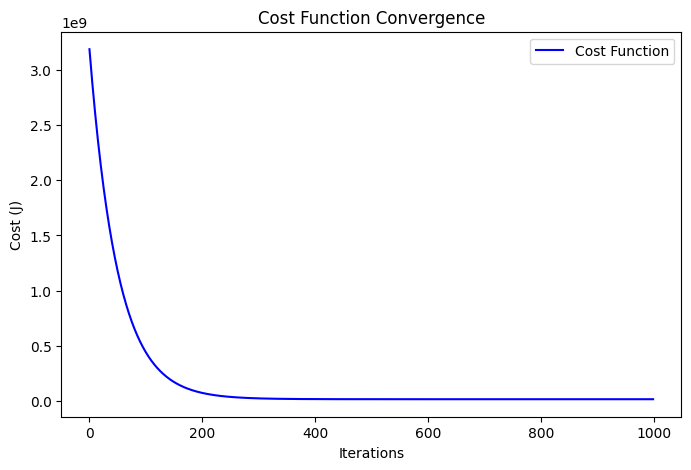

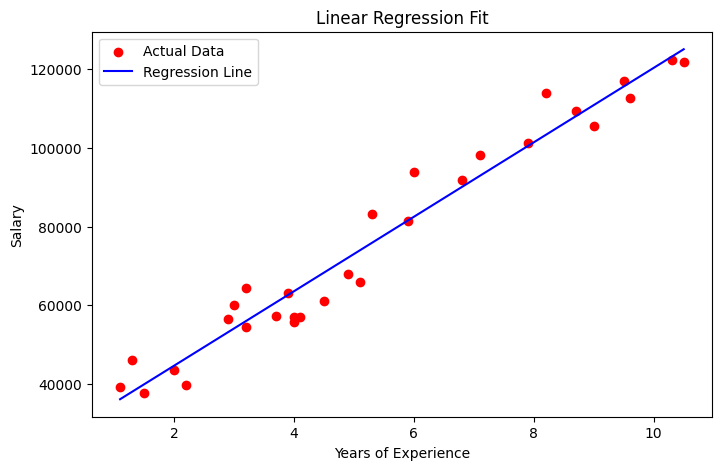

In [ ]:
import matplotlib.pyplot as plt

# Plot cost function convergence
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_history, color="b", label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

# Plot regression line on data
plt.figure(figsize=(8, 5))
plt.scatter(df["YearsExperience"], df["Salary"], color="red", label="Actual Data")
plt.plot(df["YearsExperience"], X @ theta, color="blue", label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


In [ ]:
# Load the new dataset
new_file_path = "/content/multiple_linear_regression_dataset_lab_01.csv"
df_new = pd.read_csv(new_file_path)

# Display the first few rows of the new dataset
df_new.head()


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
# Extract features and target variable
X_new = df_new[["age", "experience"]].values  # Independent variables
y_new = df_new["income"].values  # Dependent variable

# Normalize features for better convergence
X_mean = np.mean(X_new, axis=0)
X_std = np.std(X_new, axis=0)
X_new = (X_new - X_mean) / X_std

# Add bias term (intercept)
X_new = np.c_[np.ones(X_new.shape[0]), X_new]  # Adding a column of ones

# Initialize parameters
m_new = len(y_new)
theta_new = np.zeros(X_new.shape[1])  # Initialize theta for multiple variables
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Cost function for multiple variables
def compute_cost_multi(X, y, theta):
    predictions = X @ theta
    errors = predictions - y
    return (1 / (2 * m_new)) * np.sum(errors ** 2)

# Gradient descent for multiple variables
cost_history_new = []
for _ in range(iterations):
    predictions = X_new @ theta_new
    errors = predictions - y_new
    gradient = (1 / m_new) * (X_new.T @ errors)
    theta_new -= alpha * gradient
    cost_history_new.append(compute_cost_multi(X_new, y_new, theta_new))

# Final theta values and last cost
theta_new, cost_history_new[-1]


(array([40733.74139765,  -867.30392512,  8590.54328125]), 770839.1480850177)

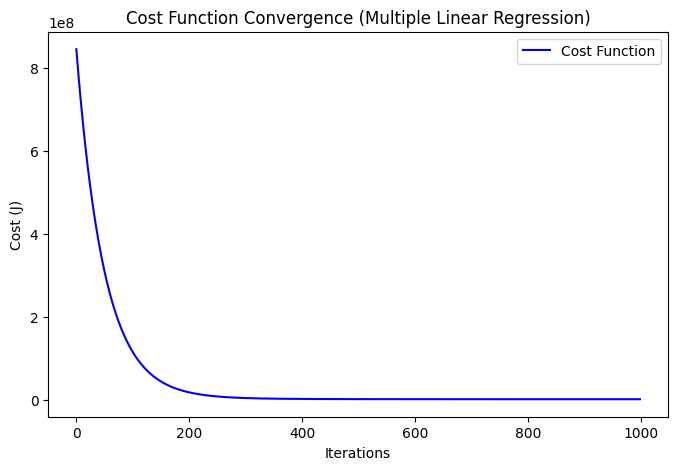

In [ ]:
# Plot cost function convergence for multiple linear regression
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_history_new, color="b", label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Cost Function Convergence (Multiple Linear Regression)")
plt.legend()
plt.show()
